In [ ]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [ ]:
import prince
import pandas as pd

### Import the HR data set 

In [ ]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

In [ ]:
hr = pd.read_csv(data_url)

In [ ]:
hr.head()

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [ ]:
hr.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [ ]:
hr.Zip = hr.Zip.astype(str)

### Pull out the categorical variables and note the dimensions of the data set.

In [ ]:
data_cat = hr.select_dtypes(include=['object'])
data_cat.dtypes

State                object
Zip                  object
Sex                  object
MaritalDesc          object
CitizenDesc          object
Hispanic/Latino      object
RaceDesc             object
Reason For Term      object
Employment Status    object
Department           object
Position             object
Manager Name         object
Employee Source      object
Performance Score    object
dtype: object

### Reduce these categorical features down to two dimensions using MCA.

In [ ]:
mca = prince.MCA()
mca.fit(data_cat)
coordinates = mca.transform(data_cat)
coordinates

,0,1
0,0.076566,0.142291
1,0.303749,0.158383
2,0.122201,0.267630
3,0.029227,0.057886
4,0.262841,0.044962
...,...,...
305,-0.011534,1.939756
306,-0.041890,1.598806
307,-0.010477,1.538161
308,-0.031968,1.727704


### Plot the coordinates of each resulting dimension.

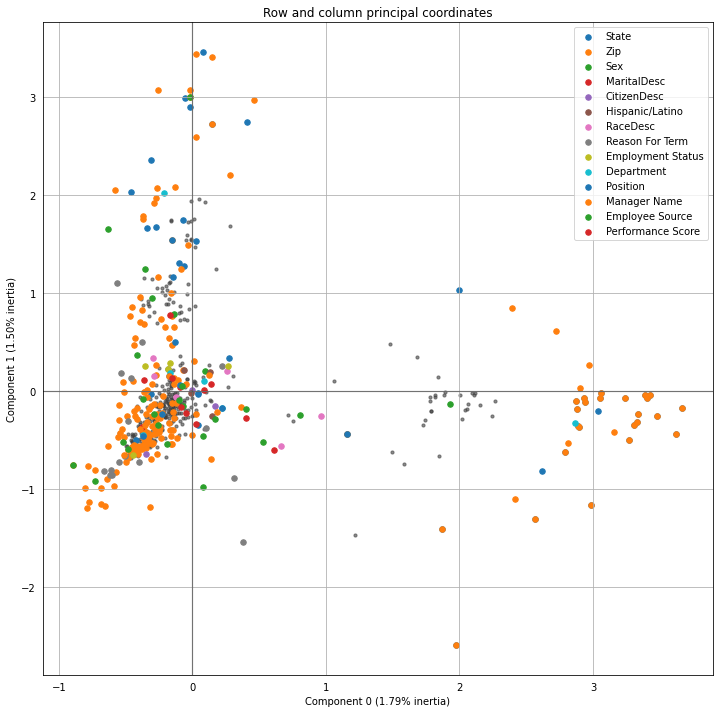

In [ ]:
mca.plot_coordinates(data_cat,figsize=(12,12))

### One hot encode the categorical features and note the change in dimensions in the data set.

In [ ]:
data_cat_ohe = pd.get_dummies(data_cat)
data_cat_ohe.shape

(310, 313)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [ ]:
ca = prince.CA()
ca.fit(data_cat_ohe)
coordinates = ca.transform(data_cat_ohe)
coordinates

,0,1
0,0.078821,0.145263
1,0.306372,0.164101
2,0.123785,0.259481
3,0.030051,0.058209
4,0.263734,0.047499
...,...,...
305,-0.009457,1.960993
306,-0.040266,1.615354
307,-0.008920,1.545771
308,-0.030097,1.739831


### Plot the coordinates of each resulting dimension.

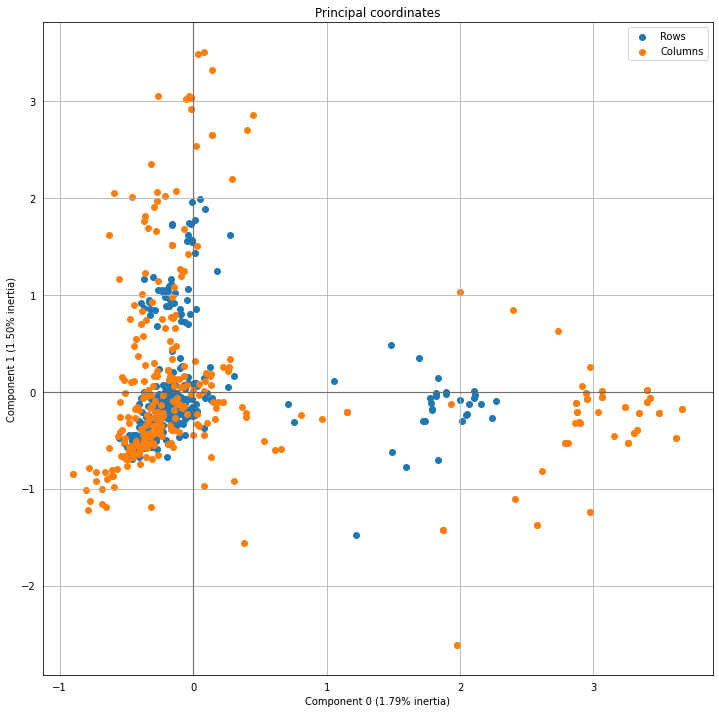

In [ ]:

ca.plot_coordinates(
    data_cat_ohe, show_col_labels=False, show_row_labels=False, figsize=(12, 12)
)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [ ]:
famd = prince.FAMD()
famd.fit(hr)
coordinates = famd.transform(hr)
coordinates

,0,1
0,0.751869,2.234825
1,-0.082760,0.347427
2,0.025404,-0.242707
3,-1.013765,-1.380020
4,-0.828594,-0.396711
...,...,...
305,1.124091,-2.061526
306,0.924024,-2.128386
307,0.726670,-2.060474
308,0.641847,-2.308188


### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

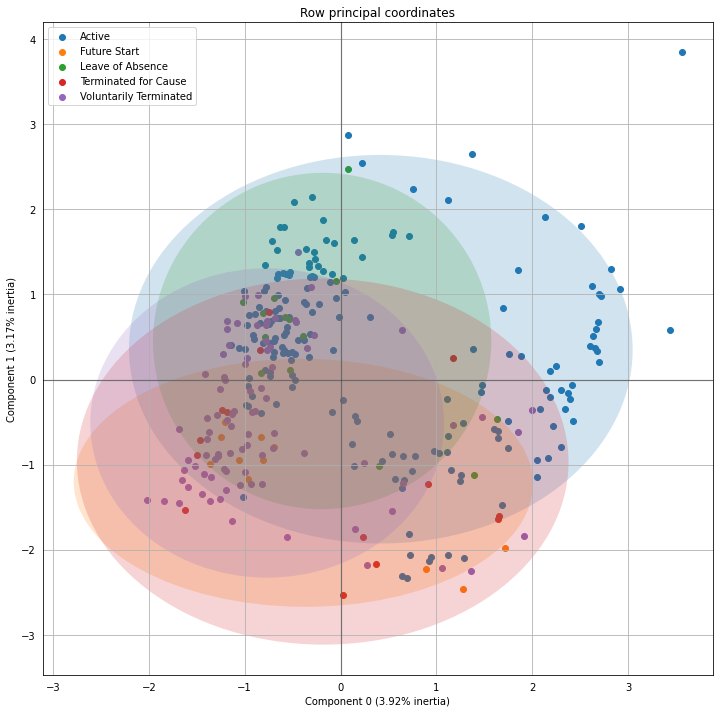

In [ ]:
famd.plot_row_coordinates(hr,figsize=(12,12),color_labels=hr['Employment Status'])